# PART I: Data Exploration and Visualization
------

The goal of this part is to explore the data and to use visualization tools to understand the patterns and relations present in it..

In [1]:
# libraries 
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from collections import Counter
import warnings
import folium
import os
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set();

In [2]:
# read datasets
order_product = pd.read_csv('data/order_product.csv')
orders = pd.read_csv('data/orders.csv')
shoppers = pd.read_csv('data/shoppers.csv')
storebranch = pd.read_csv('data/storebranch.csv')

## 1. Order Product Dataset
___

In [3]:
# dataset info
order_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120876 entries, 0 to 120875
Data columns (total 5 columns):
order_id          120876 non-null object
product_id        120876 non-null object
quantity          120876 non-null float64
quantity_found    120876 non-null float64
buy_unit          120876 non-null object
dtypes: float64(2), object(3)
memory usage: 4.6+ MB


In [4]:
# missing data
total = order_product.isnull().sum().sort_values(ascending=False)
percent = (order_product.isnull().sum()/order_product.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
buy_unit,0,0.0
quantity_found,0,0.0
quantity,0,0.0
product_id,0,0.0
order_id,0,0.0


In [5]:
order_product.head()

,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.30,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1.00,1.000,UN
3,bdfc44fb525986b7bab8c589fc47e853,9dd69b1f300666d5573e3a9934f2e03e,2.00,2.000,UN
4,bdfc44fb525986b7bab8c589fc47e853,3dfcdbe308bde67370649dd875f2507b,1.00,1.000,UN


This dataset contains five variables:

- **order_id**: Identification code for each order.
- **product_id**: Identification code of product. We can observe that an order may have more than one product associated to it. Also, a certain product can be associated with several orders (not the physical product itself, but the code associated to that product).
- **quantity**: The quantity of the product requested by the customer and measured in the unit specified by `buy_unit`.
- **quantity_found**: The quantity found in the store by the shopper. This value may or may not match the value in the variable `quantity`.
- **buy_unit**: Unit in which the quantity of the product is requested.

We can observe this dataset gives information of each order in terms of products and their quantities.

We might be interested in getting a better perspective on the distribution of the number of products for each order. In addition, it may result handy to create a dummy variable that represents the situation when the quantity requested by the customer was not found for the shopper, since this translate in more shopping time due the need of calling the customer to explain this situation (the dummy variable creation will be donde when constructing the final dataset). All of this is done in what follows. 

In [6]:
# total number of unique orders and unique products
print("n° of orders: %.0f" % len(order_product.order_id.unique()))
print("n° of products: %.0f" % len(order_product.product_id.unique()))

n° of orders: 7278
n° of products: 24999


In [7]:
number_prod_dist = []
for i in order_product.order_id.unique():
    number_prod_dist.append(order_product.order_id[order_product.order_id==i].count())

In [8]:
# distribution of the number of products for each order
number_prod_dist = order_product.groupby('order_id')['order_id'].transform('count')

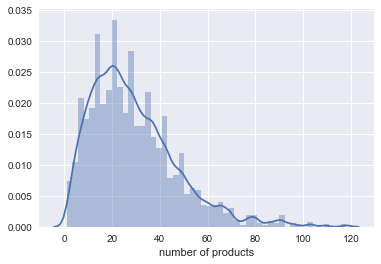

In [9]:
# plot histogram of number of products for each order
sns.distplot(number_prod_dist,axlabel='number of products');

In [10]:
# descriptive statistics of the number of products for each order variable
print("Min: %.0f" %stats.describe(number_prod_dist)[1][0])
print("Max: %.0f" %stats.describe(number_prod_dist)[1][1])
print("Mean: %.2f" %stats.describe(number_prod_dist)[2])
print("Variance: %.2f" %stats.describe(number_prod_dist)[3])
print("Mode: %.0f " %Counter(number_prod_dist).most_common(1)[0][0])

Min: 1
Max: 118
Mean: 28.99
Variance: 330.28
Mode: 20 


From the distribution and descriptive statistics of the number of products for each order, we can observe that the most requested number of products is **20** and the average "basket" contains **29** products aprox. 

## 2. Orders Dataset

In [11]:
# dataset info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7295 entries, 0 to 7294
Data columns (total 11 columns):
order_id           7295 non-null object
lat                7295 non-null float64
lng                7295 non-null float64
dow                7295 non-null int64
promised_time      7295 non-null object
actual_time        7295 non-null object
on_demand          7295 non-null bool
picker_id          7295 non-null object
driver_id          7295 non-null object
store_branch_id    7295 non-null object
total_minutes      6543 non-null float64
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 577.1+ KB


In [12]:
# missing data
total = orders.isnull().sum().sort_values(ascending=False)
percent = (orders.isnull().sum()/orders.isnull().count()).sort_values(ascending=False)
missing_data_orders = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_orders

,Total,Percent
total_minutes,752,0.103084
store_branch_id,0,0.000000
driver_id,0,0.000000
picker_id,0,0.000000
on_demand,0,0.000000
actual_time,0,0.000000
promised_time,0,0.000000
dow,0,0.000000
lng,0,0.000000
lat,0,0.000000


From the result above, we observe **752** orders with missing values in `total_minutes` variable. These are the orders for which estimates are requested.

In [13]:
orders.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861
1,0d37a1eea001f01b40232ffd496ff663,18.177712,-100.357051,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732
2,528428e9b9eb5d3bd0dbdd8da692b087,18.266832,-100.317553,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001
3,d3f7be6d64eae7405b7bf024e04807a2,18.248884,-100.322622,2,10:00:00,09:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761
4,e0ad6533b6cd9a382ec6c1d473c5036c,18.229110,-100.322672,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208


The `orders` dataset includes info about the delivery process for each order. The following variables are found:
- **order_id**: Identification code of orders.
- **lat** and **lng**: Latitude and longitude of the delivery point.
- **dow**: Day of the week of the delivery.
- **promised_time**: Delivery time promised to the customer.
- **actual_time**: Real time of the delivery.
- **on_demand**: Dummy variable that represents if a 90 minutes window time delivery was requested.
- **picker_id**: Identification code of picker shopper.
- **driver_id**: Identification code of delivery shopper.
- **store_branch_id**: Identification code of storebranch where the shopping was made.
- **total_time**: Total time from shopping until delivery.

Much information can be obtained from this data. For instance, we can get a graphical representation of the delivery points using `lat` and `lng`. We can determine the ditribution of the number of orders per week day and the number of orders for time window in a day. We can also compute the rate of on-time deliveries. In addition, we are interested in the distribution of `total_minutes` and also how the predictors impact in its distribution. Let's do all of that.

In [14]:
# Graphical representation of delivery points
# Since loading a map with many coordenates takes a long time, only the first 100 delivery points will be mapped.
lats = orders['lat'].head(100)
lons = orders['lng'].head(100)
m = folium.Map(location=[lats.mean(), lons.mean()], zoom_start=12, tiles='OpenStreetMap')
for i in range(0,len(lats)):
    folium.Marker([lats[i], lons[i]], popup='Delivery Point').add_to(m)
m

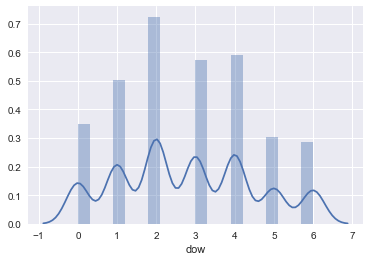

In [15]:
# distribution of number of orders per week day
sns.distplot(orders['dow']);

In [16]:
# orders per week day
Counter(orders['dow']).most_common()

[(2, 1586), (4, 1294), (3, 1256), (1, 1104), (0, 765), (5, 661), (6, 629)]

We observe from the distribution plot the most busy days are the "middle-week" days, namely, tuesday, wednesdey and thursday. The most busy day is tuesday with **1586** orders delivered.

Before we obtain the distribution of `promised_time`, it's a good idea to convert the promised_time and actual_time variables to numerical type. To do so, minutes and seconds are going to be converted to hours and added to the total.

In [17]:
# convert promised_time to numerical. 
orders['promised_time'] = (pd.to_datetime(orders['promised_time'], format='%H:%M:%S').dt.hour + 
                           pd.to_datetime(orders['promised_time'], format='%H:%M:%S').dt.minute/60 + 
                           pd.to_datetime(orders['promised_time'], format='%H:%M:%S').dt.second/3600)

In [18]:
# convert actual_time to numerical.
orders['actual_time'] = (pd.to_datetime(orders['actual_time'], format='%H:%M:%S').dt.hour + 
                         pd.to_datetime(orders['actual_time'], format='%H:%M:%S').dt.minute/60 + 
                         pd.to_datetime(orders['actual_time'], format='%H:%M:%S').dt.second/3600)

In [19]:
orders[['promised_time','actual_time']].head()

,promised_time,actual_time
0,13.0,12.004167
1,13.0,10.469444
2,11.0,10.680556
3,10.0,9.696389
4,11.0,10.131389


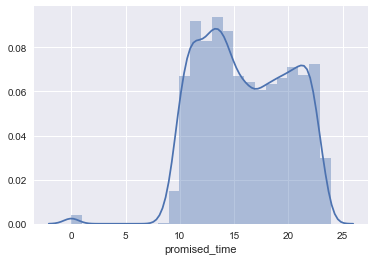

In [20]:
# distribution of promised_time
sns.distplot(orders['promised_time'], bins=24);

A first inspection of the distribution plot tell us the majority of deliveries are requested to be done around noon, however, the distribution is quite homogenuous during the most part of the day, more specifically, between 11 and 23 hours.

Now, we are going to determine the rate of orders delivered on time.

In [21]:
# rate of delivered orders on time
delivery_on_time_rate = orders[orders['promised_time']>orders['actual_time']].count()[0]/orders.shape[0]
print("Percentaje of orders delivered on time: %.2f" % delivery_on_time_rate)

Percentaje of orders delivered on time: 0.89


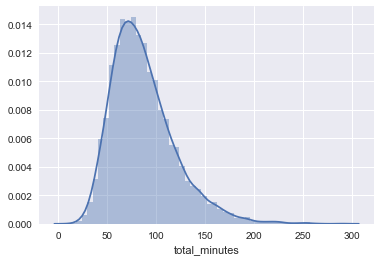

In [22]:
# distribution of total_minutes
sns.distplot(orders['total_minutes'].dropna());

In [23]:
# descriptive statistics for total_minutes
print("Min: %.0f" %orders['total_minutes'].dropna().min())
print("Max: %.0f" %orders['total_minutes'].dropna().max())
print("Mean: %.2f" %orders['total_minutes'].dropna().mean())
print("Std. Dev.: %.2f" %orders['total_minutes'].dropna().std())

Min: 13
Max: 290
Mean: 86.99
Std. Dev.: 32.51


We can observe the distribution aprox. to a normal but skewed to the right tale. The average delivery time is **87** minutes.

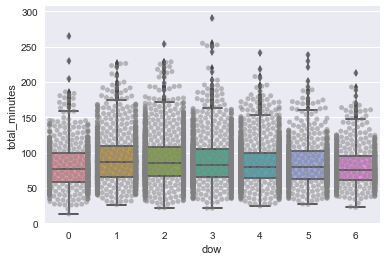

In [24]:
# relation between total_minutes and dow
sns.swarmplot(x=orders['dow'].dropna(), y=orders['total_minutes'].dropna(), color='grey', alpha=.5)
sns.boxplot(x=orders['dow'].dropna(), y=orders['total_minutes'].dropna());

It is not clear if there is a strong dependance of `total_minutes` and `dow` variables, but something interesting appears. The most busy days seem to have higher delivery times.

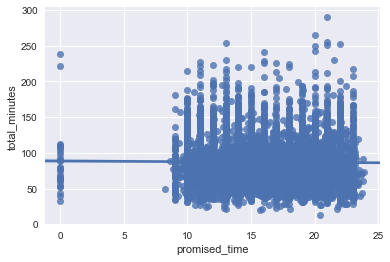

In [25]:
# relation between total_minutes and promised_time
sns.regplot(x="promised_time", y="total_minutes", data=orders.dropna());

There's no clear impact of the time window in the time of delivery. 

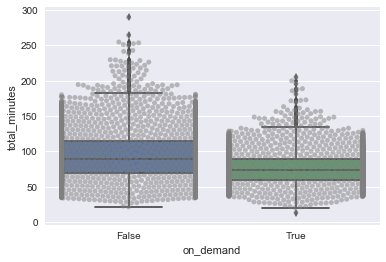

In [26]:
# relation between total_minutes and on_demand
sns.swarmplot(x=orders['on_demand'].dropna(), y=orders['total_minutes'].dropna(), color='grey', alpha=.5)
sns.boxplot(x=orders['on_demand'].dropna(), y=orders['total_minutes'].dropna());

In this case, there seem to be a pattern between these two variables. We can observe when an order is **on demand**, lower delivery times are obtained.

## 3. Shoppers Dataset

In [27]:
# dataset info
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
shopper_id       600 non-null object
seniority        600 non-null object
found_rate       564 non-null float64
picking_speed    600 non-null float64
accepted_rate    594 non-null float64
rating           566 non-null float64
dtypes: float64(4), object(2)
memory usage: 28.2+ KB


In [28]:
# missing values
total = shoppers.isnull().sum().sort_values(ascending=False)
percent = (shoppers.isnull().sum()/shoppers.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
found_rate,36,0.060000
rating,34,0.056667
accepted_rate,6,0.010000
picking_speed,0,0.000000
seniority,0,0.000000
shopper_id,0,0.000000


In [29]:
shoppers.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,0.8784,2.11,1.00,NaN
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,0.8466,1.50,1.00,4.84


The variables in this dataset are the following:
- **shopper_id**: Identification code for the shopper.
- **seniority**: Categorical variable describing the work experiencie of the shopper.
- **found_rate**: Historical percentage of products found by the shopper.
- **picking_speed**: Historical velocity rate of picking products.
- **accepted_rate**: Historical percentage of order requests accepted by the shopper.
- **rating**: Average historical evaluation gave by the customers.

For this dataset, we may be interested in the distribution of all variables. We can also examine the relation between seniority and the performance variables, i.e, found_rate, picking_speed and rating.

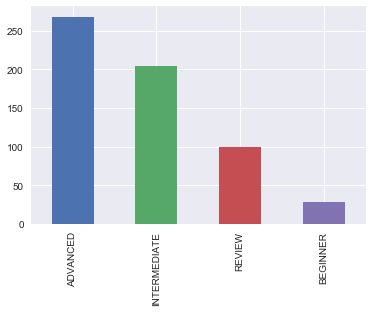

In [30]:
# visualization of seniority
shoppers['seniority'].value_counts().plot(kind='bar');

In [31]:
# distribution of seniority
pd.crosstab(index=shoppers['seniority'],  columns="count") / pd.crosstab(index=shoppers['seniority'],  columns="count").sum()

col_0,count
seniority,
ADVANCED,0.446667
BEGINNER,0.048333
INTERMEDIATE,0.340000
REVIEW,0.165000


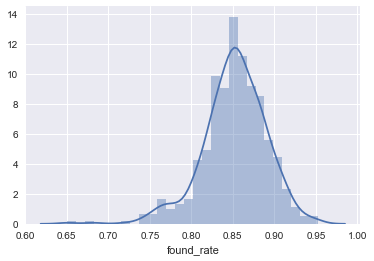

In [32]:
# distribution of found_rate
sns.distplot(shoppers['found_rate'].dropna());

In [33]:
# descriptive statistics of found_rate
print("Min: %.2f" %shoppers['found_rate'].dropna().min())
print("Max: %.2f" %shoppers['found_rate'].dropna().max())
print("Mean: %.2f" %shoppers['found_rate'].dropna().mean())
print("Std. Dev.: %.2f" %shoppers['found_rate'].dropna().std())

Min: 0.65
Max: 0.95
Mean: 0.85
Std. Dev.: 0.04


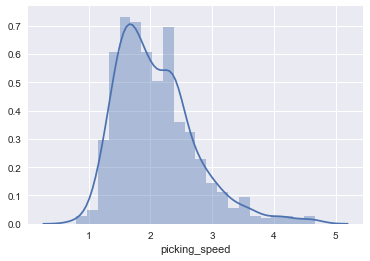

In [34]:
# distribution of picking_speed
sns.distplot(shoppers['picking_speed'].dropna());

In [35]:
# descriptive statistics of picking_speed
print("Min: %.2f" %shoppers['picking_speed'].dropna().min())
print("Max: %.2f" %shoppers['picking_speed'].dropna().max())
print("Mean: %.2f" %shoppers['picking_speed'].dropna().mean())
print("Std. Dev.: %.2f" %shoppers['picking_speed'].dropna().std())

Min: 0.80
Max: 4.66
Mean: 2.09
Std. Dev.: 0.64


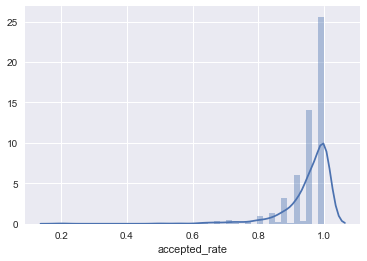

In [36]:
# distribution of accepted_rate
sns.distplot(shoppers['accepted_rate'].dropna());

In [37]:
# descriptive statistics of picking_speed
print("Min: %.2f" %shoppers['accepted_rate'].dropna().min())
print("Max: %.2f" %shoppers['accepted_rate'].dropna().max())
print("Mean: %.2f" %shoppers['accepted_rate'].dropna().mean())
print("Std. Dev.: %.2f" %shoppers['accepted_rate'].dropna().std())

Min: 0.20
Max: 1.00
Mean: 0.95
Std. Dev.: 0.08


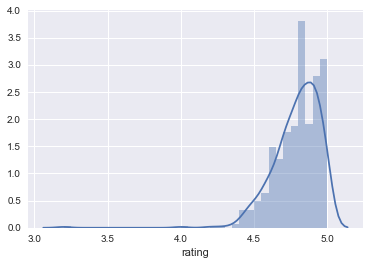

In [38]:
# distribution of rating
sns.distplot(shoppers['rating'].dropna());

In [39]:
# descriptive statistics of rating
print("Min: %.2f" %shoppers['rating'].dropna().min())
print("Max: %.2f" %shoppers['rating'].dropna().max())
print("Mean: %.2f" %shoppers['rating'].dropna().mean())
print("Std. Dev.: %.2f" %shoppers['rating'].dropna().std())

Min: 3.20
Max: 5.00
Mean: 4.79
Std. Dev.: 0.16


Now we want to study how seniority relates to the performance varibles.

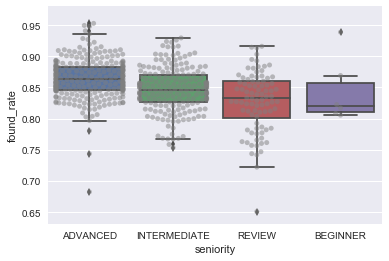

In [40]:
# seniority and found_rate boxplot
sns.swarmplot(x=shoppers['seniority'], y=shoppers['found_rate'], color='grey', alpha=.5)
sns.boxplot(x=shoppers['seniority'], y=shoppers['found_rate']);

From the boxplot we can observe there is a positive relation (almost lineal) between `seniority` and `found_rate`. We need to be aware, tho, the lower number of samples of begginer might not be representative.

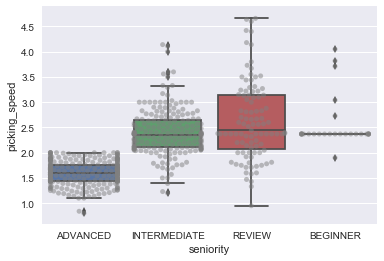

In [41]:
# seniority and picking_speed boxplot
sns.swarmplot(x=shoppers['seniority'], y=shoppers['picking_speed'], color='grey', alpha=.5)
sns.boxplot(x=shoppers['seniority'], y=shoppers['picking_speed']);

Here again we find a relation between the two variables. More experienced shoppers present lower pciking speed times.

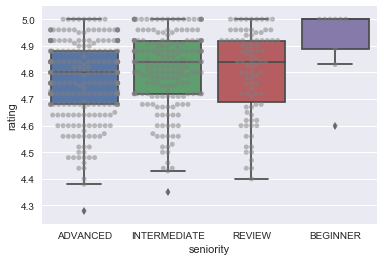

In [42]:
# seniority and rating
sns.swarmplot(x=shoppers['seniority'], y=shoppers['rating'][shoppers['rating']>4.25], color='grey', alpha=.5)
sns.boxplot(x=shoppers['seniority'], y=shoppers['rating'][shoppers['rating']>4.25]);

In this case, there's no clear trend between the variables. No conclusion about the impact of seniority and rating can be established.

We can conclude from the analysis of this dataset that the experience of shoppers may have a relevant impact in the total time of deliveries, since as we observed, more experienced shoppers tend to found the products quicker and have lower picking times.

## 4. Storebranch Dataset

In [43]:
# dataset info
storebranch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
store_branch_id    113 non-null object
store              113 non-null object
lat                113 non-null float64
lng                113 non-null float64
dtypes: float64(2), object(2)
memory usage: 3.6+ KB


This data has no missing values.

In [44]:
storebranch.head()

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160308,-100.260673
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,18.272830,-100.318814
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273494,-100.319585
3,49b7d60d6095a9f1129ce798102b62f4,6447951cd071f6f045fd4e6194920926,18.247743,-100.403558
4,8f21cfda17b340aeee062220d0bee8e5,452ae015bf846e1d2932b7ea15720d64,18.203111,-100.297714


This dataset contains info of the locations of stores. The variables are:
- **store_branch_id**: Identification code of the store branch.
- **store**: Identification code of the store to whom the branch belongs.
- **lat** and **lng**: Latitude and longitude of the store_branch.

The relevant information that can be extracted from this dataset is the location of the store branch, which if combined with the location of the delivery points, a measure of distance can be calculated. Also, a graphical representation of the stores and the delivery points can be made allowing to get a visual distribution.

Another important insight could be the overall diferences between stores (not the storebranches but the brands, for instance, Jumbo vs Lider). Some stores could have better locations of its branches, or have a better and easier access to the products, or have, in average, more checkout servers allowing lower paying checkout times. We will be interested then in specifying the store for each order.

In [45]:
# graphical representation of stores and delivery points
# blue marks are delivery points and red marks are stores.
store_lats = storebranch['lat'].head(20)
store_lons = storebranch['lng'].head(20)
m2 = folium.Map(location=[lats.mean(), lons.mean()], zoom_start=12, tiles='OpenStreetMap')
for i in range(0,len(lats)):
    folium.Marker([lats[i], lons[i]], popup='Delivery Point').add_to(m2)
for j in range(0,len(store_lats)):
    folium.Marker([store_lats[j], store_lons[j]], popup='Store', icon=folium.Icon(color='red')).add_to(m2)
m2

## 5. Conclusions and Subsequent Work
From the data analysis and visualization just completed, we can extract the following conclusions:
- An order being `on demand` or not, may have an impact in the total time.
- The number of products of each order is a critical variable in the total time.
- The experience of shoppers has an impact in the found and picking times, and therefore, in the total time.
- Some store characteristics may play an important role in the total time of delivieries. 
- The distance between storebranch and delivery points will have a great impact in the target variable.
- No presense of relevant outliers are found.

Actions to take for generating the training dataset:
- Join relevant variables in one dataset.
- Generate a dummy variable representing if a order is `on demand`.
- Generate a dummy variable representing if the order was delivered on time.
- Generate dummy variables for the store of each order.
- Estimate the distance between the store and the delivery point.